In [ ]:
#importing the dataset
from google.colab import drive
drive.mount("/content/gdrive")

from google.colab import files
uploaded = files.upload()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving Compute_ML_Task.csv to Compute_ML_Task (3).csv


In [ ]:
import pandas as pd
#creating the dataframe
df=pd.read_csv('Compute_ML_Task.csv')

# I do not know much about data preprocessing and couln't find it in the links I recieved so I have just checked for the null values
print(df.isnull().value_counts())
# none of the columns have null values as seen

Sample code number  Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class
False               False            False                    False                     False              False                        False        False            False            False    False    683
dtype: int64


In [ ]:

#logistic regression

from sklearn.model_selection import train_test_split
#From the data available to us, we split the data in a ratio of our choice into train data and test data(about 80% is train data)
#The model learns from the train data and performs on the test data
#The performance that is y values predicted by the model is then compared in various ways to the y actual from the data set used
x_train, x_test, y_train, y_test = train_test_split(df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']],df['Class'],train_size=0.77,random_state=10)
#the data is split in the ratio 77%-train data and 23%-test data



In [ ]:
from sklearn.linear_model import LogisticRegression
#training the model using training dataset
model = LogisticRegression()
model.fit(x_train, y_train)

#predicted values are calculated by the model
y_predicted = model.predict(x_test)
print(y_predicted)



[4 4 4 4 4 4 2 2 4 4 4 2 2 2 4 2 2 4 2 4 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 4 4
 4 2 2 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 4 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 4
 2 2 4 2 2 4 2 2 2 2 4 2 4 4 4 4 2 4 2 2 2 2 2 4 4 4 4 2 4 4 2 2 2 4 4 2 4
 2 2 2 4 2 2 2 4 4 2]


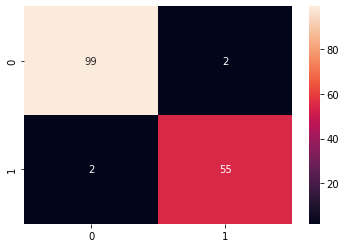

In [ ]:
#to check how good or close the predicted values are to the actual values
from sklearn.metrics import confusion_matrix

#The confusion matrix is a simple representation of no of values of: tn, tp, fn, fp [t:true, f:false, n:negative, p:positive]
cfm=confusion_matrix(y_test, y_predicted) #creating the confusion matrix by passing actual, predicted values

#cfm will be a 2D array containg the values, ravel() brings it into a line(1D-array) and we unpack and assign the values
tn, fp, fn, tp=cfm.ravel()

#visualizing
import seaborn as sns
sns.heatmap(cfm,annot=True) #annot=True labels the squares i.e: 99,2,2,55


There are 683 rows of data, we've chosen 23% of it as test data, i.e. 23% of 683=157.09 which is 157 data values
And sum of the confusion matrix should also add up to the total number of test cases, which it does: 99+2+2+55=157 (total)

This means 99 number of values out of 157 taken for test came out to be true negative and so on for 2,2,55.

In [ ]:

from sklearn.metrics import accuracy_score

#the formula for accuracy score is given by: ac=(tp+tn)/all
ac=(tp+tn)/(tp+tn+fp+fn)
print(ac)
#this can also be calculated using sklearn
accuracy_score(y_test, y_predicted)
#as we observe both give the same value

0.9746835443037974


0.9746835443037974